## Importing necessary libraries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.express as px
import feature_engine
import seaborn as sns

from scipy.stats import randint
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset 

In [2]:
traindf = pd.read_csv(r"C:\Users\HP\Desktop\DataScience - DT\DSData-master\Flight_Price\Data_Train.csv")
traindf.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
testdf = pd.read_csv(r"C:\Users\HP\Desktop\DataScience - DT\DSData-master\Flight_Price\Test_set.csv")
testdf.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL ? BOM ? COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR ? TRV ? DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU ? HYD ? BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU ? BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU ? BOM ? BLR,16:30,22:35,6h 5m,1 stop,No info


## Exploratory Data Analysis 

In [4]:
traindf.shape

(10683, 11)

In [5]:
testdf.shape

(2671, 10)

In [6]:
traindf.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
testdf.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [8]:
#Checking for null values - train dataset
traindf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Checking for null values - test dataset
testdf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

The analysis of the above datasets are as follow - Here the test and train dataset are two seperate entities.
Train Dataset
            
        1. This dataset has 10683 rows and 11 columns. Of these columns, Price(only numerical column) is the target variable and  we are predicting the price of the flight ticket with the help of the other 10 features.
        2. There is a single null value in two of the categorical columns(Route and Total stops)
        
Test Dataset

        1. This dataset has 2671 rows and 10 columns. However, there are no missing values in this dataset. 

In [10]:
df = traindf.append(testdf)

In [11]:
# Feature Engineering - making the columns more accessible in order to perform EDA
# Converting Date OF Journey into Day, Date and Month of Journey

df['Date'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['Day']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [12]:
# drop the date of journey column as we have split the Day,Month, and Year.
df.drop(labels='Date_of_Journey', axis=1, inplace=True)

In [13]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Day
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,6,0
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,12,3,1
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,1,3,4
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,12,3,1
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,5,0


In [14]:
df.describe()

,Price,Date,Month,Day
count,10683.000000,13354.000000,13354.000000,13354.000000
mean,9087.064121,13.389846,4.710574,2.937697
std,4611.359167,8.439060,1.165622,2.006993
min,1759.000000,1.000000,3.000000,0.000000
25%,5277.000000,6.000000,3.000000,1.000000
50%,8372.000000,12.000000,5.000000,3.000000
75%,12373.000000,21.000000,6.000000,5.000000
max,79512.000000,27.000000,6.000000,6.000000


In [15]:
# Converting the total duration in minutes
s = pd.to_timedelta(df['Duration'])
df['Hours_Journey'] = s.dt.components['hours']
df['Minutes_Journey'] = s.dt.components['minutes']

In [16]:
# Calculating the total flight time in minutes
df['FlightTime'] = df['Hours_Journey']*60 + df['Minutes_Journey'] 

In [17]:
# Drop - Duration column as we have split the Hour and Minutes of the total time taken
df.drop(labels='Duration', axis=1, inplace=True)

# Dropping the newly created Hours_journey and Minutes_Journey
df.drop(labels='Hours_Journey', axis=1, inplace=True)
df.drop(labels='Minutes_Journey', axis=1, inplace=True)

In [18]:
df.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [19]:
#Writing a simple function in order to convert the Total Stops column into a numerical column
def conversion_stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        str(x).strip()
        stps=str(x).split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(conversion_stops)

### Univariate Analysis

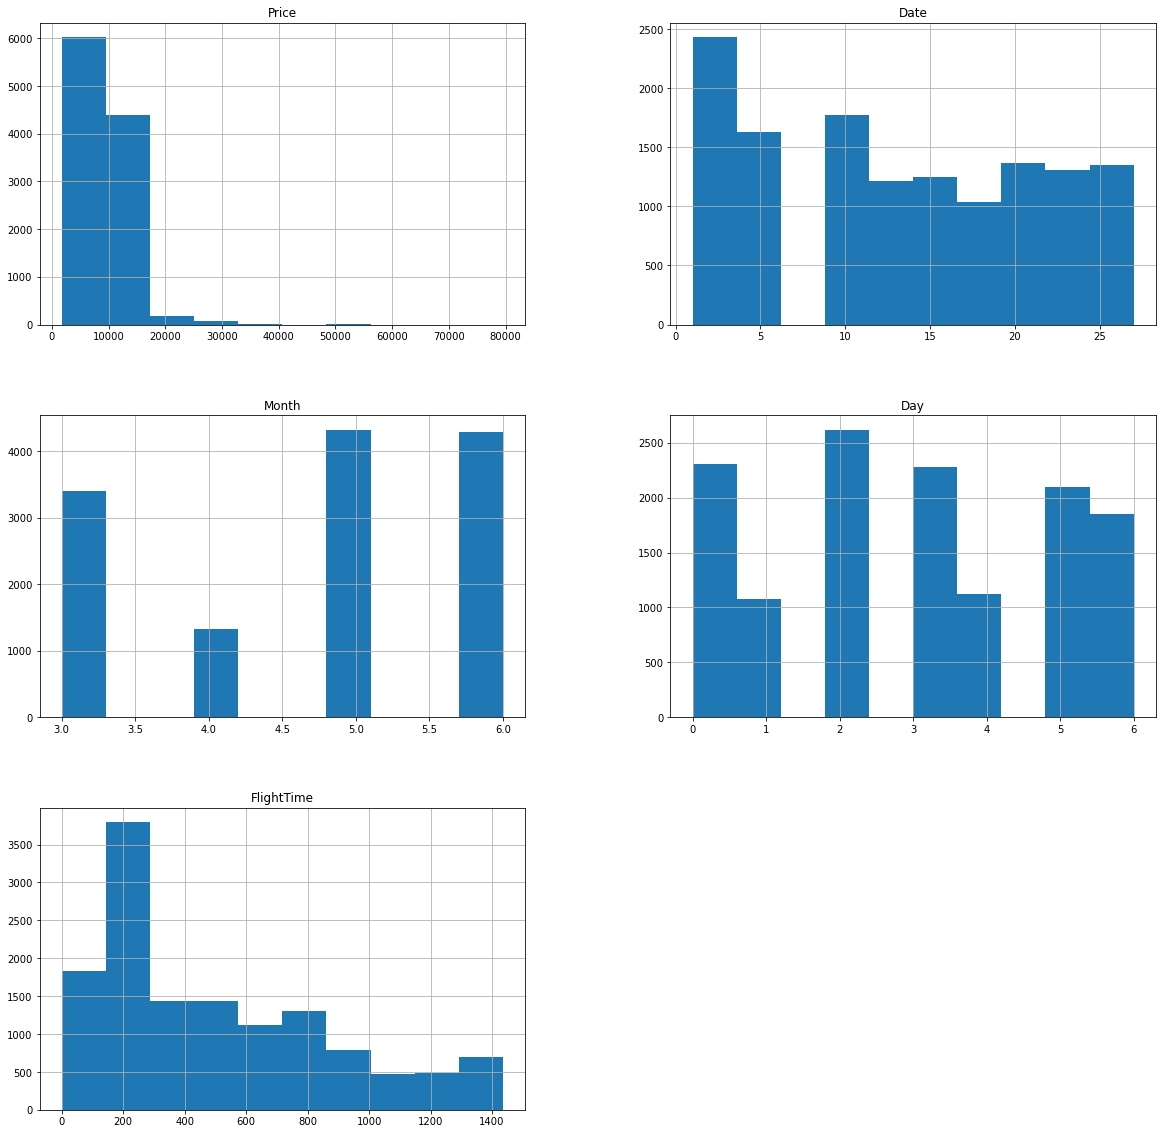

In [20]:
df.hist(figsize = (20,20))
plt.show()

Looking at the above columns, we are able to draw the following conclusions:
    
    1. The price of the flights is between 0 and 80000(since the test data does not have any data for Price)
    2. The flights are evenly spread around the month(date wise). However, for the data that we have, the flights are only in months March, April, May, or June
    3. The flight time(in minutes) is spread around but we need to perform more analysis(since this list contains information of flight inclusive of stoppage time when the plan makes more than one stop)
    4. Overall, we have slightly lower number of flights on two days of the week - Monday and Thursday

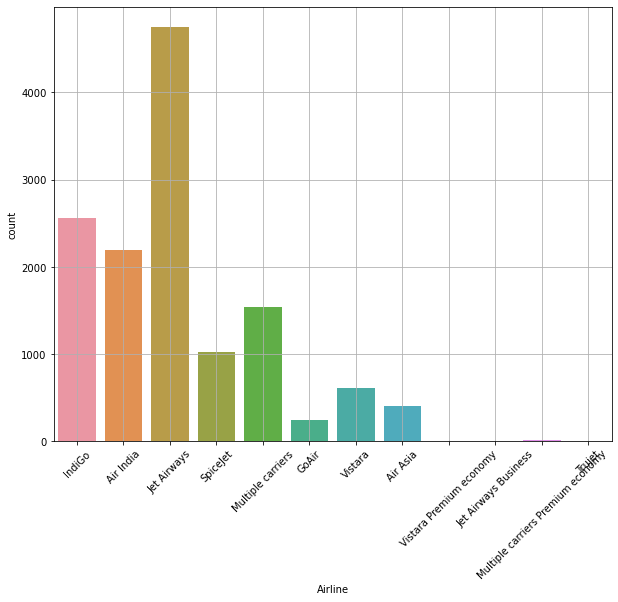

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
#Getting more information of columns via countplot/value counts
fig=plt.figure(figsize=(10,8))
sns.countplot(df['Airline'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 
df.Airline.value_counts()

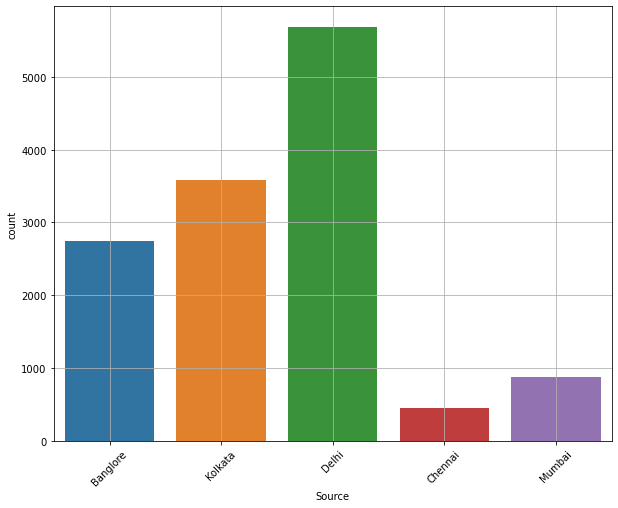

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [22]:
#Getting more information of columns via countplot/value counts
fig=plt.figure(figsize=(10,8))
sns.countplot(df['Source'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 
df.Source.value_counts()

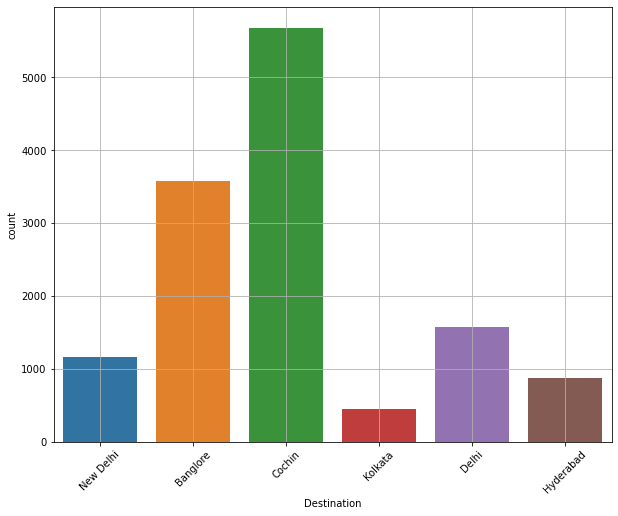

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [23]:
#Getting more information of columns via countplot/value counts
fig=plt.figure(figsize=(10,8))
sns.countplot(df['Destination'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 
df.Destination.value_counts()

Looking at these three columns, we are draw these conclusions:
    
    1. Jet airways handles more than a third(almost 35%) of the overall traffic, with Indigo and Air-India handling another 35% of the overall traffic. Overall, these three airline handles 70%+ of the total air traffic.
    2. More than 40% of the total flight have their source as Delhi. Delhi, Bangalore, and Kolkata control 90% of the flight, which Chennai having only around 3.4% of the flights leaving
    3. We have a total of 6 destinations when compared to the 5 source for the flights
    4. Cochin has the maximum flights landing(almost 42.5% of the total flights land in Cochin). Bangalore comes in at 2nd and Delhi is at the third place controlling around 10% of the total flight arrivals.

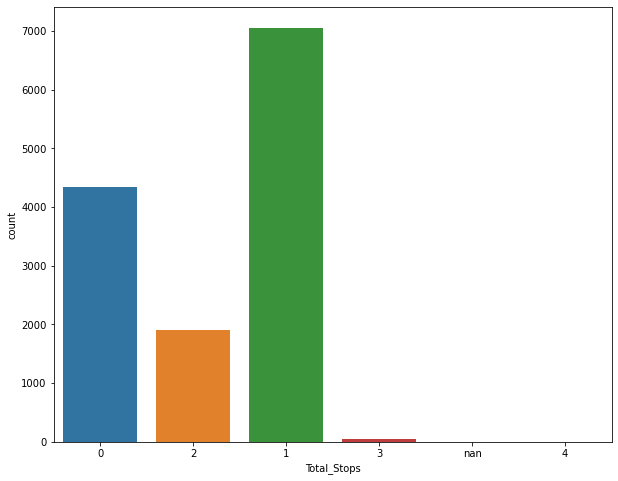

1      7056
0      4340
2      1899
3        56
4         2
nan       1
Name: Total_Stops, dtype: int64

In [24]:
#Getting more information of columns via countplot/value counts
fig=plt.figure(figsize=(10,8))
sns.countplot(df['Total_Stops'])
plt.show() 
df.Total_Stops.value_counts()

Conclusions on the "Total_Stops" column

    1. More than 50% of the flights have atleast 1 stop in this dataset. 
    2. A close second is non-stop flights(which is around 32.5% of the dataset)
    3. There are hardly any flight which have more than 2 stops, with 2 stops having around 14% of the total flights

In [25]:
#Using a function, let us segregate the timings and 
def timechange(x):
    x = x.strip()
    time = (int)(x.split(':')[0])
    if(time >= 5 and time <= 11):
        x='Morning'
    elif(time >= 11 and time <= 16):
        x='Afternoon'
    elif(time >= 16 and time <= 20):
        x='Evening'
    elif(time >= 20 or time <= 5):
        x='Night'    
    return x
df['Dep_Time']=df['Dep_Time'].apply(timechange)
df['Arrival_Time']=df['Arrival_Time'].apply(timechange)

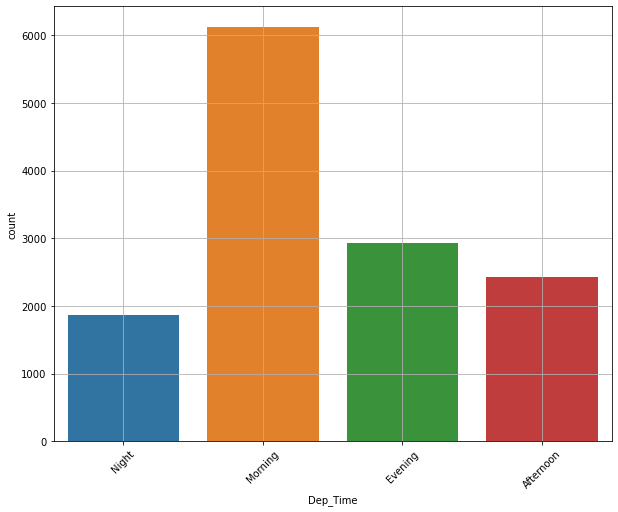

Morning      6121
Evening      2936
Afternoon    2425
Night        1872
Name: Dep_Time, dtype: int64

In [26]:
#Getting more information of columns via countplot/value counts
fig=plt.figure(figsize=(10,8))
sns.countplot(df['Dep_Time'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 
df.Dep_Time.value_counts()

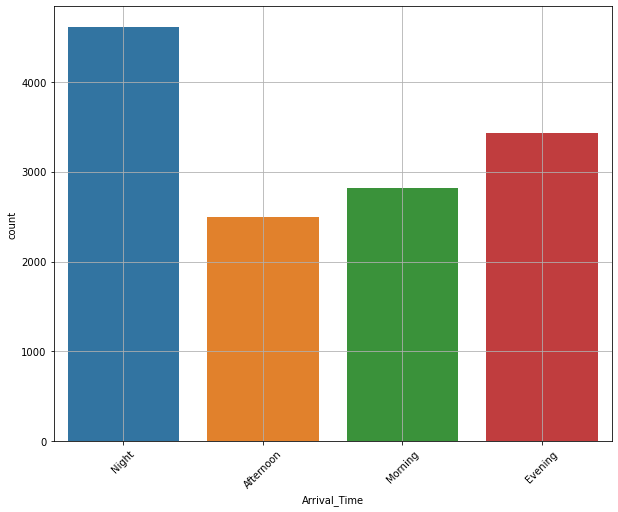

Night        4608
Evening      3428
Morning      2820
Afternoon    2498
Name: Arrival_Time, dtype: int64

In [27]:
#Getting more information of columns via countplot/value counts
fig=plt.figure(figsize=(10,8))
sns.countplot(df['Arrival_Time'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 
df.Arrival_Time.value_counts()

After splitting the timings of arrival and departure based on the duration - Morning/Evening/Afternoon/Night, we are able to draw the following conclusions

    1. There are fewer takers for flights in the nights but the poeple arriving at the night are maximum. So we can assume that a lot of people are moving back to their home state/city in the night flights 
    2. People take maximum flights in the morning session and that makes sense as people want to manage their workday by arriving early at their destination 

In [28]:
df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

Since over 10k records of the total 13354 records are empty, and it makes sense to drop the column because it won't impact the price of the flight as much.

In [29]:
df.drop('Additional_Info',1,inplace=True)

In [30]:
df.groupby(['Month']).mean()

,Price,Date,Day,FlightTime
Month,,,,
3,10673.205580,13.775791,3.514361,510.789859
4,5770.847081,11.004521,2.202713,307.569706
5,9127.247548,15.016632,2.592285,512.475167
6,8828.796134,12.178021,3.055063,517.818479


In [31]:
df.groupby(['Day']).mean()

,Price,Date,Month,FlightTime
Day,,,,
0,8499.530811,13.653663,5.008669,478.248808
1,9026.149597,17.436803,4.635688,505.892193
2,9277.514190,12.080122,4.463182,525.272797
3,8931.379367,14.586071,4.977661,537.527376
4,9717.996700,14.067797,4.267618,360.664585
5,8972.905389,12.087744,4.944683,498.071054
6,9525.508820,12.150892,4.406165,480.530016


In [32]:
df.groupby(['Date']).mean()

,Price,Month,Day,FlightTime
Date,,,,
1,10492.642791,4.707191,2.822832,493.139362
3,9041.040094,4.520776,2.919668,425.397045
6,10391.401398,4.668101,2.161033,543.644745
9,9551.474395,4.835500,4.300170,532.280950
12,9110.774295,5.151565,3.046952,524.563427
15,8127.810976,4.944844,3.171063,466.510791
18,8671.573317,4.666023,3.406371,448.368726
21,8351.760576,4.266813,2.426170,493.676901
24,8399.446768,4.633512,3.106350,460.994644


We are able to analysis price when we grouping the overall Date,Month, and Day. Lets publish some of the findings

    1. Average fare price is highest the month of March. This could be due to the high demand of flights so that children and their mothers could travel to their hometown or some other destination for a summer vacation. Similarly, the prices increase in the month of May because they travel back to their destinations.
    2. Based on the day of the week, the average prices don't change much as the overall average is similar throughout the week. However, it is costliest to travel of the 5th day of week(Thursday) and lowest to travel on the first of the week(Sunday) as lesser people fly on the holiday 
    3. Tickets are costliest during the beginning of the month with the dates - 1,6, and 9 being the costliest dates during the month to book flights
    
Comparing the Flight times with the Date,Month, and Day, we are able to publish the following findings

    1. Month of April has the maximum number of flights which are less than 2 stops(0 or 1 stop) since the overall average of Flight time accross this month is lowest

### Multi-variate Analysis

In [33]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Date,Month,Day,FlightTime
0,IndiGo,Banglore,New Delhi,BLR ? DEL,Night,Night,0,3897.0,24,3,6,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,Morning,Afternoon,2,7662.0,1,5,2,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,Morning,Night,2,13882.0,9,6,6,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,Evening,Night,1,6218.0,12,5,6,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,Afternoon,Night,1,13302.0,1,3,4,285
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,Morning,Morning,0,3873.0,24,6,0,145
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,Evening,Morning,1,11087.0,12,3,1,930
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,Morning,Morning,1,22270.0,1,3,4,1265
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,Morning,Morning,1,11087.0,12,3,1,90
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,Morning,Evening,1,8625.0,27,5,0,470


In [34]:
#Analysing prices of tickets sold with flight brands to give a clearer picture on budget analysis
pd.crosstab(df.Airline,df.Price>15000)

Price,False,True
Airline,,
Air Asia,405,0
Air India,2086,106
GoAir,237,3
IndiGo,2559,5
Jet Airways,4221,525
Jet Airways Business,2,6
Multiple carriers,1370,173
Multiple carriers Premium economy,16,0
SpiceJet,1025,1


In [35]:
pd.crosstab(df.Airline,df.Price<4000)

Price,False,True
Airline,,
Air Asia,351,54
Air India,2102,90
GoAir,187,53
IndiGo,2182,382
Jet Airways,4695,51
Jet Airways Business,8,0
Multiple carriers,1543,0
Multiple carriers Premium economy,16,0
SpiceJet,514,512


In [36]:
pd.crosstab(df.Airline,df.Price<8000)

Price,False,True
Airline,,
Air Asia,121,284
Air India,1555,637
GoAir,71,169
IndiGo,705,1859
Jet Airways,4036,710
Jet Airways Business,8,0
Multiple carriers,1197,346
Multiple carriers Premium economy,16,0
SpiceJet,249,777


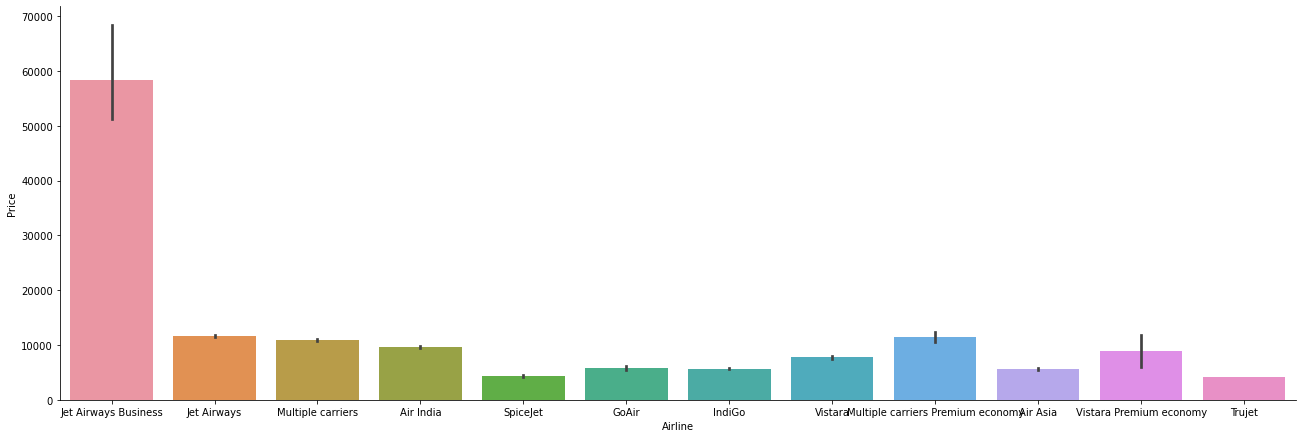

In [37]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

Looking at the above cross tabs and the cat plot, we are able to get certain information with regards to the flight's prices

    1. Jet Airways, Jet Airways business, and Air India mostly offer expensive tickets and probably offer Premium services as atleast 10% of the flight tickets sold collectively are priced over 15k
    2. Spicejet is definitely a low cost airline because more than 50% of the total tickets sold being priced below 4k and another 25% of the tickets being sold at below 8k. The remaining 25% of tickets cost less than 15k as only 1 ticket is priced greater than 15000.
    3. Indigo prices its ticket as an average price - neither are the prices too expensive nor are they very cheap

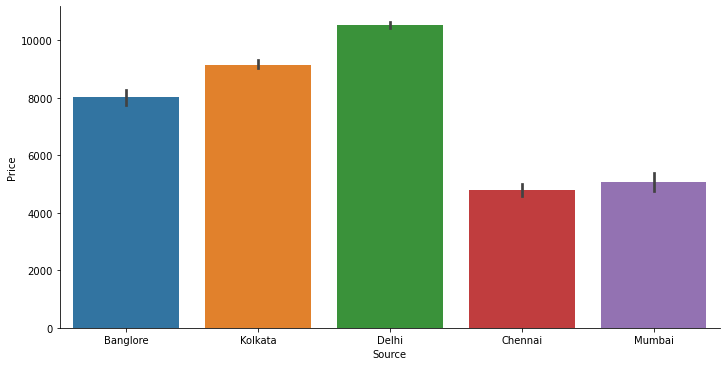

In [38]:
#Comparing the source location with price
sns.catplot(y='Price',x='Source',data=df,kind="bar",height=5,aspect=2)
plt.show()

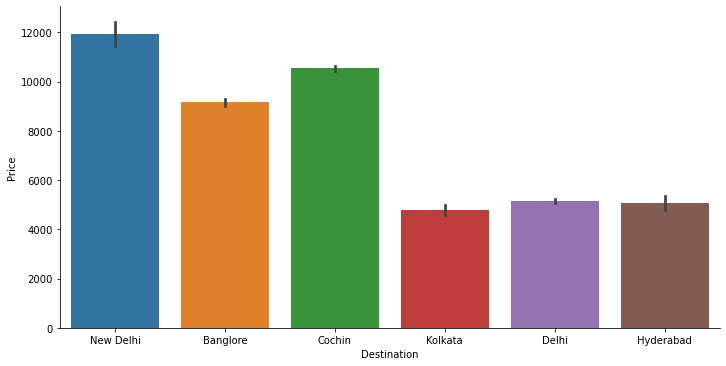

In [39]:
#Comparing the destination location with price
sns.catplot(y='Price',x='Destination',data=df,kind="bar",height=5, aspect=2)
plt.show()

From the above two plots, we are able to find that 

    1. New Delhi is both the most expensive source and destination - both flights moving into the capital and moving out of it.
    2. Chennai is the cheapest source overall to fly out of, no matter what the destination
    3. Kolkata is the cheapest destination overall to fly to no matter what the source

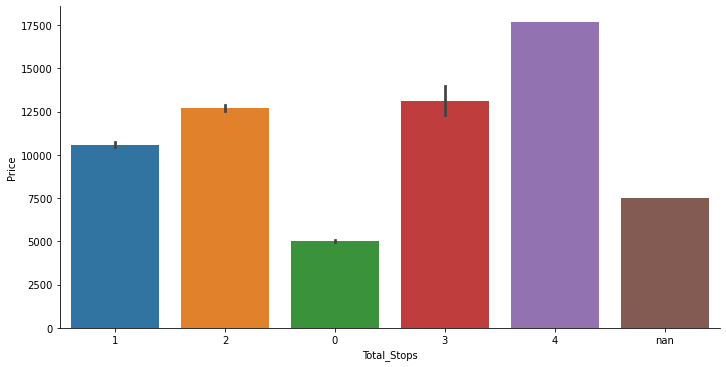

In [40]:
# Total_Stops Vs Price
sns.catplot(y='Price',x='Total_Stops',data= df.sort_values('Price',ascending=False),kind="bar",height=5, aspect=2)
plt.show()

As expected flights with 3 and 4 stops are the costliest flights as they travel to more than one destination and if need be we can combine these destinations to complete a business trip

In [41]:
#Correlation by means of a heatmap

<AxesSubplot:>

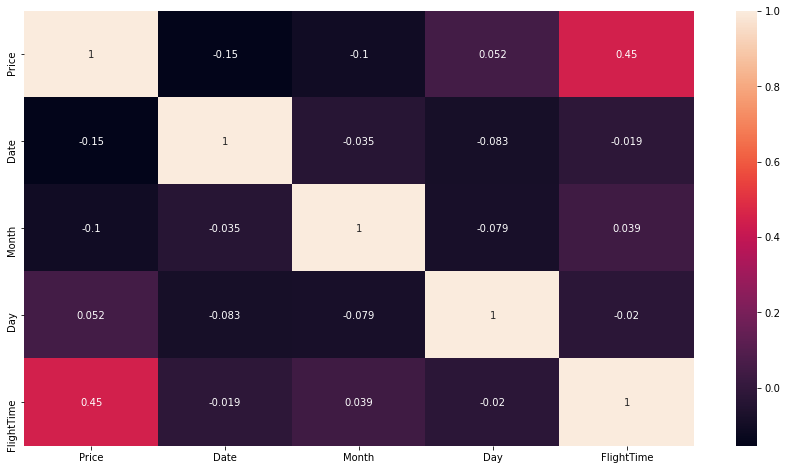

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

## Feature Engineering

In [43]:
#Encoding via Label Encoder - Airline/Source/Destination
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Airline'] = lb.fit_transform(df['Airline'])
df['Source'] = lb.fit_transform(df['Source'])
df['Destination'] = lb.fit_transform(df['Destination'])

#Encoding via Label Encoder - Total_Stops/Dep_Time/Arrival_Time column(s)
df['Total_Stops'] = lb.fit_transform(df['Total_Stops'])
df['Dep_Time'] = lb.fit_transform(df['Dep_Time'])
df['Arrival_Time'] = lb.fit_transform(df['Arrival_Time'])

In [44]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Date,Month,Day,FlightTime
0,3,0,5,BLR ? DEL,3,3,0,3897.0,24,3,6,170
1,1,3,0,CCU ? IXR ? BBI ? BLR,2,0,2,7662.0,1,5,2,445
2,4,2,1,DEL ? LKO ? BOM ? COK,2,3,2,13882.0,9,6,6,1140
3,3,3,0,CCU ? NAG ? BLR,1,3,1,6218.0,12,5,6,325
4,3,0,5,BLR ? NAG ? DEL,0,3,1,13302.0,1,3,4,285
5,8,3,0,CCU ? BLR,2,2,0,3873.0,24,6,0,145
6,4,0,5,BLR ? BOM ? DEL,1,2,1,11087.0,12,3,1,930
7,4,0,5,BLR ? BOM ? DEL,2,2,1,22270.0,1,3,4,1265
8,4,0,5,BLR ? BOM ? DEL,2,2,1,11087.0,12,3,1,90
9,6,2,1,DEL ? BOM ? COK,2,1,1,8625.0,27,5,0,470


In [45]:
df.shape

(13354, 12)

In [46]:
df.drop(labels='Route', axis=1, inplace=True)

In [47]:
#Splitting the train dataset from the dataset(since it contains values in the price column)
dftrain = df[~df.Price.isna()]

In [48]:
#Splitting the test dataset from the dataset(since it contains no values in the price column)
dftest = df[df.Price.isna()]

In [49]:
#Outlier removal using z-score technique
from scipy.stats import zscore
z = np.abs(zscore(dftrain))
df_final = dftrain[(z<3).all(axis = 1)]

## Machine Learning Models

In [50]:
X = df_final.drop('Price', axis = 1)
y = df_final.loc[:,'Price']
print(X.shape," : Features")

(10540, 10)  : Features


In [51]:
#Splitting the features and label after importing necessary libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 73)

In [52]:
# checking the shape
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7905, 10), (7905,), (2635, 10), (2635,))

In [53]:
# importing dependencies
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [55]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 49.17516978640616
MAE: 2258.4008376586225
MSE: 8329998.432347051
RMSE: 2886.1736663525726


In [60]:
dtr = DecisionTreeRegressor(criterion='mse')
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [61]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 67.31770521868125
MAE: 1442.4774383301708
MSE: 5356505.140298017
RMSE: 2314.412482747623


In [62]:
rfr =  RandomForestRegressor()
rfr.fit(X_train,y_train)
pred=rfr.predict(X_test)

In [63]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 78.93408398409831
MAE: 1251.0294133073653
MSE: 3452624.369839631
RMSE: 1858.123884416653


In [64]:
adtr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
adtr.fit(X_train,y_train)
pred=adtr.predict(X_test)

In [65]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 77.80291099936679
MAE: 1290.968059762598
MSE: 3638019.3657486723
RMSE: 1907.3592649914362


In [66]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
pred=ada.predict(X_test)

In [67]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 61.95287890853985
MAE: 2022.3636109003132
MSE: 6235779.986185044
RMSE: 2497.154377723781


In [68]:
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
pred=knr.predict(X_test)

In [69]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 55.150210530020956
MAE: 2000.216091081594
MSE: 7350711.736880455
RMSE: 2711.21960321927


Looking at the above models, we are able to see that RandomForestRegressor has the highest accuracy in predicting the price

#### Hyper-parameter tuning using Randomized Search CV

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_dict = {'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [74]:
# fitting the model
gs_mod = GridSearchCV(RandomForestRegressor(),param_grid=param_dict,cv=5,verbose=3)
gs_mod.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, score=0.816, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, score=0.810, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, score=0.812, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, score=0.813, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, score=0.834, total=   1.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, score=0.814, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, score=0.812, total=   1.3s
[CV] 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.7min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [77]:
print('Best Estimator : {}'.format(gs_mod.best_estimator_))
print('Best Score : {}'.format(gs_mod.best_score_))

Best Estimator : RandomForestRegressor(max_depth=20, min_samples_split=10)
Best Score : 0.8183224833126654


In [84]:
rfr_bm =  RandomForestRegressor(max_depth=20, min_samples_split=10)
rfr_bm.fit(X_train,y_train)
pred = rfr_bm.predict(X_test)

In [85]:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 81.53161329637189
MAE: 1203.3467733331363
MSE: 3026899.08933634
RMSE: 1739.7985772313816


After doing hyperparameter tuning, we are able to increase the accuracy of the aforesaid 'RandomForest' algorithm. Lets save the best model for futher use.

#### Saving the best model

In [86]:
best_model = RandomForestRegressor(max_depth=20, min_samples_split=10)

In [87]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10)

In [88]:
best_model.score(X_test,y_test)

0.8175878046872046

In [93]:
# saving the best model
import joblib
joblib.dump(best_model,'Flightpricepred.pkl')

['Flightpricepred.pkl']